# student data
This notebook analyzes pass/fail data for class

In [1]:
data=[50,5,10,20,50,30,20,4,5,64]
print(data*2)

[50, 5, 10, 20, 50, 30, 20, 4, 5, 64, 50, 5, 10, 20, 50, 30, 20, 4, 5, 64]


In [2]:
import numpy as np

grade=np.array([90,80,70,60,50,40,30,30,40,30])

print(grade*2)

[180 160 140 120 100  80  60  60  80  60]


In [3]:
grade.shape

(10,)

In [4]:
grade.mean()

52.0

In [5]:
study_hr=[5,10,2,6,6,7,2,9,8,9]

student_data=np.array([study_hr,grade])


In [6]:
avg_study=student_data[0].mean()
avg_grade=student_data[1].mean()

print(f'Average study time: {avg_study}\nAverage grade: {avg_grade}')

Average study time: 6.4
Average grade: 52.0


In [7]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'], 
                            'Age': [25, 30, 25, 30, 35],
                            'Studyhr':[5,4,6,7, 8],
                            'Grad':[50,70,50,70, 80]})
df_students

,Name,Age,Studyhr,Grad
0,Alice,25,5,50
1,Bob,30,4,70
2,Charlie,25,6,50
3,David,30,7,70
4,Eve,35,8,80


In [8]:
df_students[df_students.Grad==50]

,Name,Age,Studyhr,Grad
0,Alice,25,5,50
2,Charlie,25,6,50


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\811124313.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name,rotation=45)


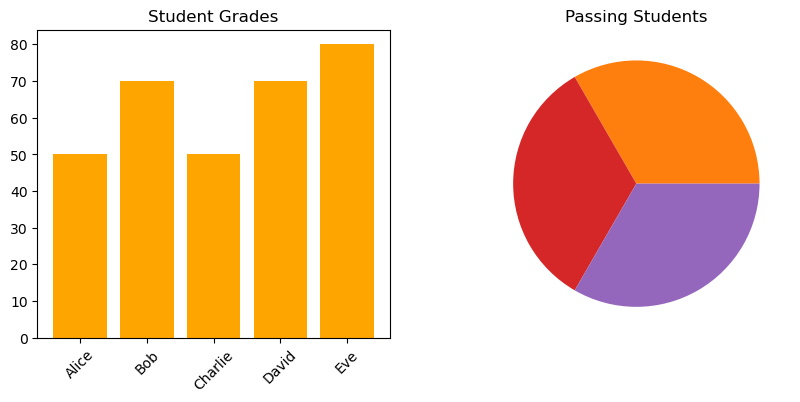

In [9]:
from matplotlib import pyplot as plt

fit, ax =plt.subplots(1,2, figsize=(10,4))

ax[0].bar(x=df_students.Name, height=df_students.Grad, color='orange')

ax[0].set_title('Student Grades')

ax[0].set_xticklabels(df_students.Name,rotation=45)

passes_count = df_students.Grad >= 51
ax[1].pie(passes_count)
ax[1].set_title('Passing Students')
plt.show()


<Axes: xlabel='Name'>

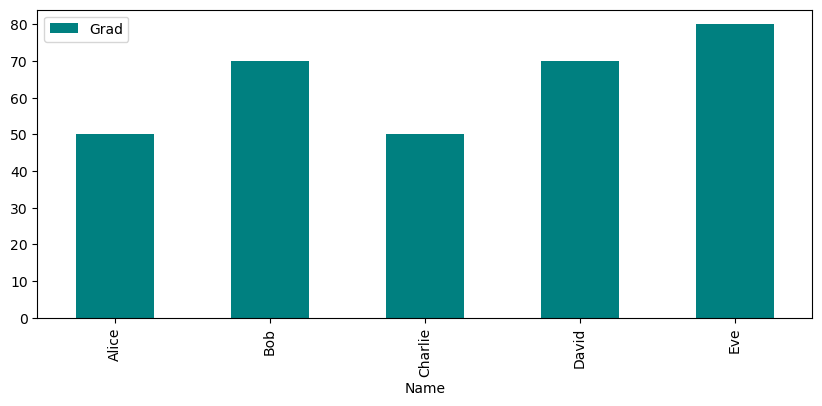

In [10]:
df_students.plot.bar(x='Name', y='Grad', figsize=(10, 4), color='teal')

Minimum value: 50
Maximum value: 80
Mean value: 64.0
Median value: 70.0
Mode value: 50


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\1925657126.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


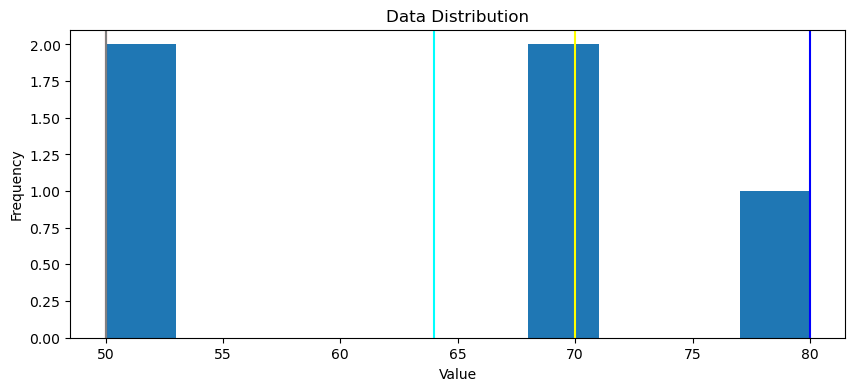

In [11]:
grades=df_students.Grad

min_val=df_students.Grad.min()
max_val=df_students.Grad.max()
mean_val=df_students.Grad.mean()
median_val=df_students.Grad.median()
mode_val=df_students.Grad.mode()[0]

print(f'Minimum value: {min_val}\nMaximum value: {max_val}\nMean value: {mean_val}\nMedian value: {median_val}\nMode value: {mode_val}')

fig = plt.figure(figsize=(10, 4))

plt.hist(grades)

plt.axvline(x=min_val, color='red', label='Min')
plt.axvline(x=max_val, color='blue', label='Max')
plt.axvline(x=mean_val, color='cyan', label='Mean')
plt.axvline(x=median_val, color='yellow', label='Median')
plt.axvline(x=mode_val, color='gray', label='Mode')


plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11540\3481772730.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


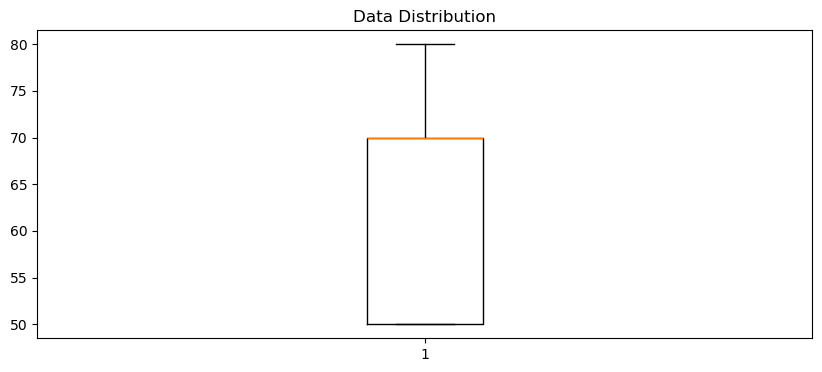

In [12]:
#boxplot
grades=df_students.Grad

fig=plt.figure(figsize=(10,4))

plt.boxplot(grades)

plt.title("Data Distribution")

fig.show()

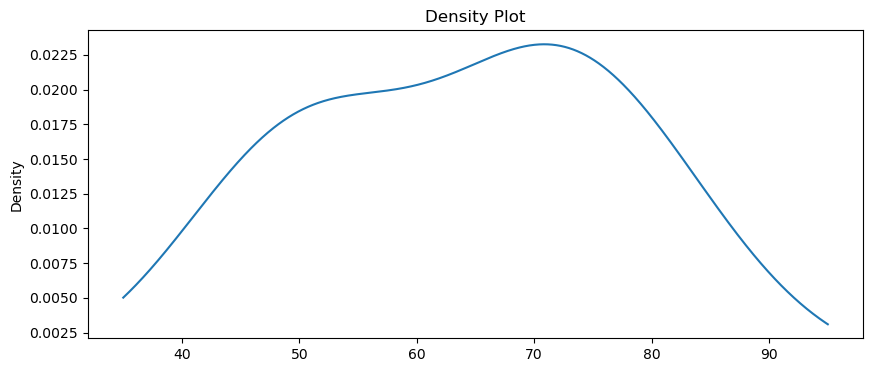

In [13]:
def show_density(data):
    fig=plt.figure(figsize=(10,4))

    data.plot.density()

    plt.title('Density Plot')

    plt.show()
show_density(df_students.Grad)

In [14]:
df_sample=df_students[df_students.Studyhr>1]

df_sample

,Name,Age,Studyhr,Grad
0,Alice,25,5,50
1,Bob,30,4,70
2,Charlie,25,6,50
3,David,30,7,70
4,Eve,35,8,80


<Axes: title={'center': 'Studyhr'}, xlabel='Grad'>

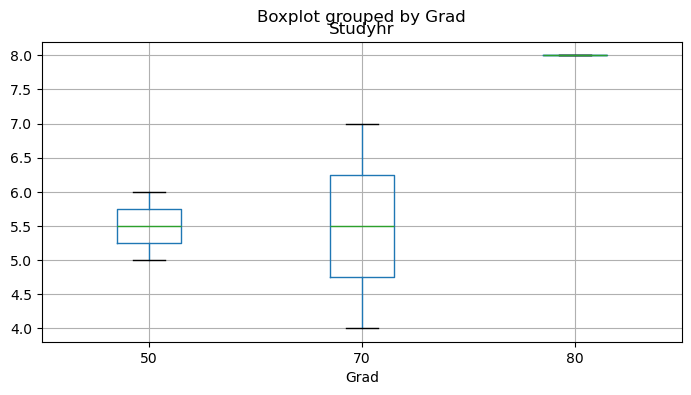

In [15]:
df_sample.boxplot(column='Studyhr', by='Grad', figsize=(8,4))

<Axes: xlabel='Name'>

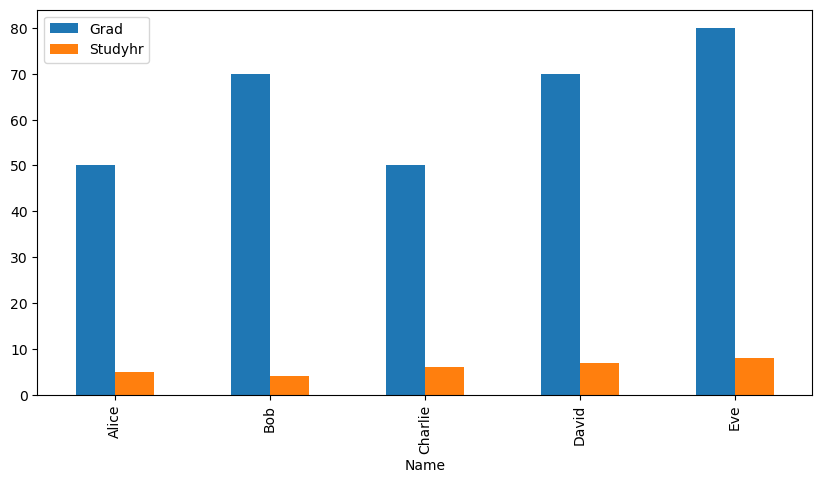

In [16]:
df_sample.plot(x='Name', y=['Grad', 'Studyhr'], kind='bar', figsize=(10, 5))

<Axes: xlabel='Name'>

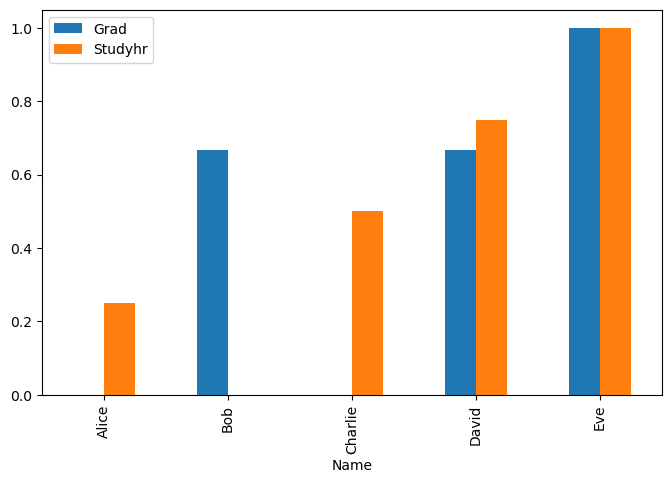

In [17]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxscaler used for normalization
scaler=MinMaxScaler()

df_normalized=df_sample[['Name','Grad','Studyhr']].copy()
df_normalized[['Grad', 'Studyhr']]=scaler.fit_transform(df_normalized[['Grad', 'Studyhr']])

df_normalized.plot(x='Name', y=['Grad', 'Studyhr'], kind='bar', figsize=(8,5))

In [18]:
df_normalized.Grad.corr(df_normalized.Studyhr)
#negative correlation values means chances of not being related
#positive correlation values means study hour is related to grade
# range -> -1 to 1

0.4714045207910317

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='Studyhr', ylabel='Grad'>

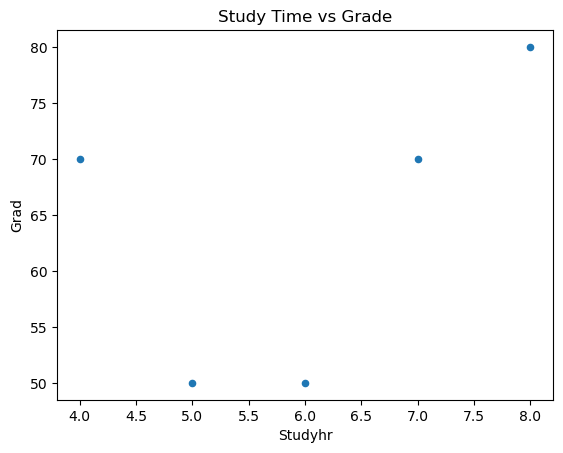

In [19]:
df_sample.plot.scatter(title="Study Time vs Grade", x="Studyhr", y="Grad")

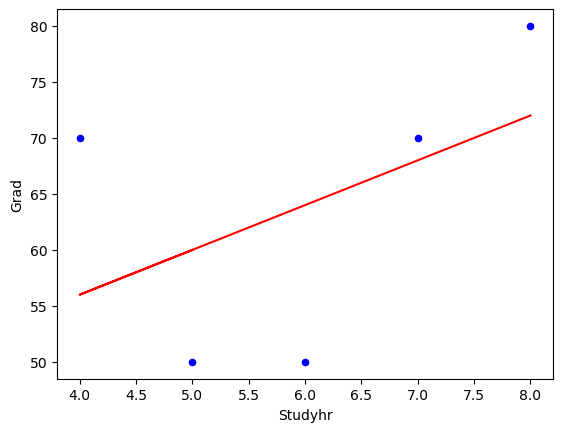

4.0 40.0


In [20]:
from scipy import stats

df_Regression = df_sample[['Grad', 'Studyhr']].copy()

m, b, r, p, stderr = stats.linregress(df_Regression['Studyhr'], df_Regression['Grad'])

df_Regression['fx']=m*df_Regression['Studyhr']+b

df_Regression['error']=df_Regression['fx']-df_Regression['Grad']

df_Regression.plot.scatter(x='Studyhr', y='Grad', color='blue')

plt.plot(df_Regression['Studyhr'], df_Regression['fx'], color='red')

plt.show()

print(m,b)

In [21]:
def predict(x):
    m = 4.0
    b = 40
    return m * x + b

prediction = predict(15)

prediction


100.0